In [102]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import math
import string
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
from IPython.display import display
import pandas as pd
from tqdm import tqdm

In [103]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# Turn ON for kaggle filepaths
kaggle = True

kaggle1 = "/kaggle/input/transformers-hackathon/"
kaggle2 = "/kaggle/input/transformers-hackathon-features/"

image_dir = "./resized_train"
caption_pred_file = "caption_prediction_train.csv"
concept_det_file = "concept_detection_train.csv"
concept_file = "concepts.csv"

if kaggle:
    image_dir = kaggle1 + image_dir
    caption_pred_file = kaggle2 + caption_pred_file
    concept_det_file = kaggle2 + concept_det_file
    concept_file = kaggle2 + concept_file

In [104]:
captions = pd.read_csv(caption_pred_file, sep='\t')
captions = captions.set_index('ID')['caption'].to_dict()
captions = {id: caption for id, caption in captions.items()}

In [105]:
concepts = pd.read_csv(concept_file, sep='\t')
concept_list = concepts.set_index('concept')['concept_name'].to_dict()

concepts = pd.read_csv(concept_det_file, sep='\t')
concepts = concepts.set_index('ID')['cuis'].to_dict()
concepts = {id: item_concepts.split(";") for id, item_concepts in concepts.items()}

## Elements

In [106]:
n_elements = len(captions)

In [107]:
print(f"There are {n_elements} total elements in the dataset")

There are 83275 total elements in the dataset


## Captions

In [109]:
unique_captions = {}
for caption in captions.values():
    if caption not in unique_captions:
        unique_captions[caption] = 1
    else:
        unique_captions[caption] += 1
unique_captions = [caption for caption in unique_captions.values()]

<BarContainer object of 11 artists>

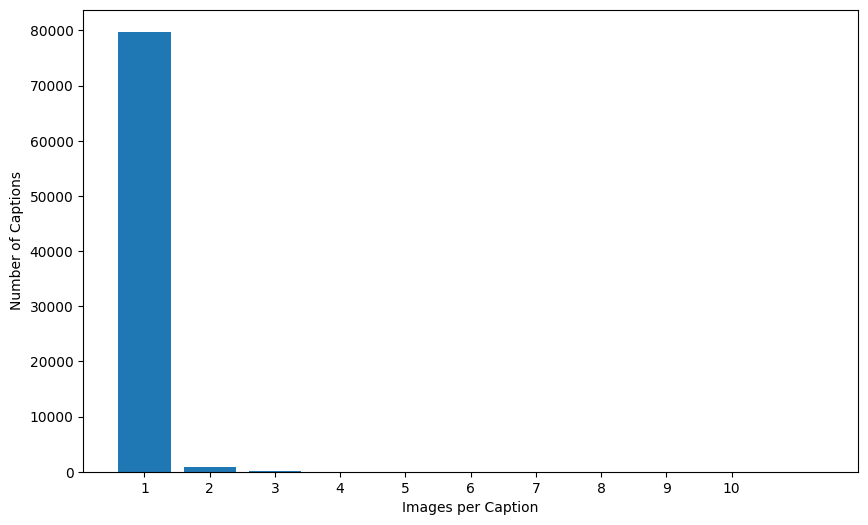

In [149]:
limit = 10

labels, counts = np.unique(unique_captions, return_counts=True)

plt.figure(figsize=(10,6))
plt.xticks(range(limit + 1))
plt.xlabel("Images per Caption")
plt.ylabel("Number of Captions")
plt.bar(labels[:limit + 1], counts[:limit + 1], align='center')

In [150]:
labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  21,  23,  26,  29,  32,  34,  37,  42,  61,
       115, 179, 261])

In [152]:
print(f"There are {len(unique_captions)} unique captions in the dataset")
print(f"On average each caption has {sum(unique_captions) / len(unique_captions)} image(s)")
print(f"The caption(s) with the lest images has {min(unique_captions)} image(s)")
print(f"The caption(s) with the most images has {max(unique_captions)} image(s)")
print(f"The most frequent number of images per caption is {labels[np.argmax(counts)]}")

There are 80813 unique captions in the dataset
On average each caption has 1.030465395419054 image(s)
The caption(s) with the lest images has 1 image(s)
The caption(s) with the most images has 261 image(s)
The most frequent number of images per caption is 1


## Concepts

In [112]:
image_concept_count = [len(concept_list) for concept_list in concepts.values()]
concept_image_count = {}
for concept_list in concepts.values():
    for concept in concept_list:
        if concept not in concept_image_count:
            concept_image_count[concept] = 1
        else:
            concept_image_count[concept] += 1
concept_image_count = [concept for concept in concept_image_count.values()]

<BarContainer object of 31 artists>

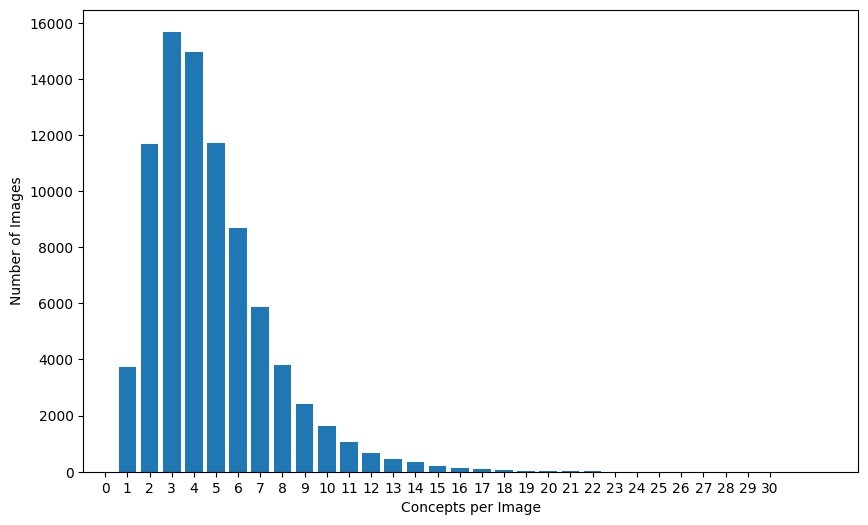

In [155]:
limit = 30

labels, counts = np.unique(image_concept_count, return_counts=True)

plt.figure(figsize=(10,6))
plt.xticks(range(limit + 1))
plt.xlabel("Concepts per Image")
plt.ylabel("Number of Images")
plt.bar(labels[:limit + 1], counts[:limit + 1], align='center')

In [156]:
print(f"There are {len(concept_image_count)} concepts")
print(f"On average each concept has {sum(concept_image_count) / len(concept_image_count)} image(s)")
print(f"The concept(s) with the least images has {min(concept_image_count)} image(s)")
print(f"The concept(s) with the most images has {max(concept_image_count)} image(s)")
print(f"The most frequent number of concepts per image is {labels[np.argmax(counts)]}")

There are 8374 concepts
On average each concept has 47.22450441843802 image(s)
The concept(s) with the least images has 2 image(s)
The concept(s) with the most images has 25989 image(s)
The most frequent number of concepts per image is 3


<BarContainer object of 101 artists>

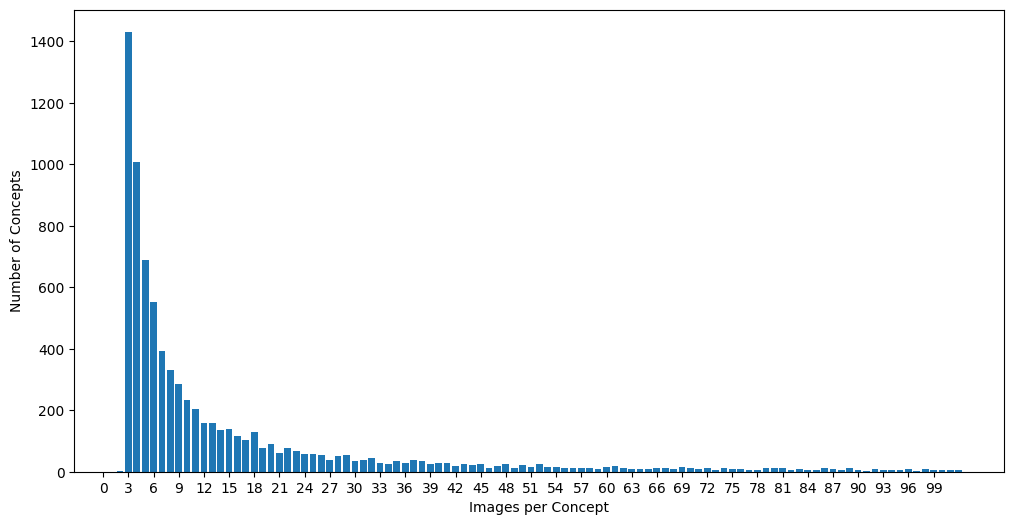

In [157]:
limit = 100

labels, counts = np.unique(concept_image_count, return_counts=True)

plt.figure(figsize=(12,6))
plt.xticks(range(0, limit + 1, 3))
plt.xlabel("Images per Concept")
plt.ylabel("Number of Concepts")
plt.bar(labels[:limit + 1], counts[:limit + 1], align='center')